In [1]:
from src.params import FIGURES_DIR, RESULTS, PROCESSED, DATA_DIR

Project Directory: /data2/isshamie/time_neutrophils

Config paths:
__name__ src.params
__package__ src
__file__ /data2/isshamie/time_neutrophils/src/params.py
__cached__ /data2/isshamie/time_neutrophils/src/__pycache__/params.cpython-37.pyc
path /data2/isshamie/time_neutrophils/src/params.py
DATA_DIR /data2/isshamie/time_neutrophils/data
PROCESSED /data2/isshamie/time_neutrophils/data/processed
PARAM_DIR /data2/isshamie/time_neutrophils/parameters
RESULTS /data2/isshamie/time_neutrophils/results
FIGURES_DIR /data2/isshamie/time_neutrophils/figures


In [2]:
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [4]:
fig_dir = os.path.join(FIGURES_DIR,"tsne_out", "0")
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
umap_result = os.path.join(RESULTS,"tsne_out", "0", "embedding.p")

In [6]:
meta_df = pd.read_csv(os.path.join(DATA_DIR, "processed","meta.tsv"),sep="\t", index_col=0)
meta_df

,Timepoint,Stimuli,Sample,Genotype,Stimuli Names
0_2G3,3,G,2,WT,Nec1s
1_2G3,3,G,2,WT,Nec1s
2_2G3,3,G,2,WT,Nec1s
3_2G3,3,G,2,WT,Nec1s
4_2G3,3,G,2,WT,Nec1s
...,...,...,...,...,...
4592_4B46,46,B,4,WT,zVD
4593_4B46,46,B,4,WT,zVD
4594_4B46,46,B,4,WT,zVD
4595_4B46,46,B,4,WT,zVD


In [7]:
raw = pickle.load(open(os.path.join(PROCESSED, "data_df_log10_z.p"),"rb"))
raw

,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity
0_2G3,4.514737,-35.280948,4.073811,-0.549886,-1.508243,-1.286249
1_2G3,-0.206776,-23.196179,18.581889,-1.036545,-1.525713,-1.696325
2_2G3,-1.666082,-10.317551,10.892828,-0.955933,-1.518481,-1.653310
3_2G3,-1.082179,-15.445497,13.969401,-0.843089,-1.504416,-1.656892
4_2G3,-3.274187,0.564852,2.419749,-0.857998,-1.514578,-1.643740
...,...,...,...,...,...,...
4592_4B46,0.928028,0.081115,-0.633219,-1.657626,-1.026704,0.483296
4593_4B46,1.411085,-5.132832,4.370616,-2.036756,-0.607149,0.626727
4594_4B46,0.641696,-0.609064,1.004787,-1.695808,0.370317,0.438746
4595_4B46,-1.253652,0.564852,0.284477,-0.612722,1.667999,0.419938


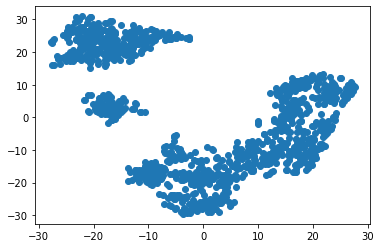

In [11]:
plt.scatter(embedding[:,0], embedding[:,1])

In [8]:
embedding = pickle.load(open(umap_result,"rb"))
embedding

df = meta_df
df["embedding_1"] = embedding[:,0]
df["embedding_2"] = embedding[:,1]
df = pd.merge(df, raw,how='inner',left_index=True, right_index=True)


ValueError: Length of values does not match length of index

In [ ]:
df

In [ ]:
n_iter = 10
n_sample = 1000
# Create figures
color_labels = df["Stimuli Names"].unique()
rgb_values = (sns.color_palette("Set2", len(color_labels)))
color_map = dict(zip(color_labels, rgb_values))


for i in range(n_iter):
    curr_df = df.sample(n = n_sample, replace=False)
    plt.figure(figsize=(15,15))
    pallete=sns.color_palette("bright", len(color_labels))
    sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", palette=pallete, hue='Stimuli Names',style="Genotype",
                            size=0.5)

    plt.legend(loc='upper right')



    for i in raw.columns.values:
        plt.figure(figsize=(15,15))
        pallete=sns.color_palette("bright", len(color_labels))
        sns.scatterplot(data=curr_df,x="embedding_1", y="embedding_2", hue=i,
                        style="Genotype", size=0.5)
        #df.plot.scatter("embedding_1","embedding_2", hue=df['Stimuli'])#.map(color_map),s=0.5)
        plt.legend(loc='upper right')
